# Digital Epidemiology Second Project

### **Group 02**
- Alessia Ciarlo (1796690): ciarlo.1796690@studenti.uniroma1.it
- Alessandro Garbetta (1785139): garbetta.1785139@studenti.uniroma1.it


**Assigned tasks: file: edges-2.csv, tasks: 1, 2.A, 3.A, 4.B**

# Import libraries

In [ ]:
!pip install EoN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx                       #library for manipulation of complex networks
import numpy as np
import EoN                                  #(Epidemics on Networks) is a Python package for the simulation of epidemics on networks
import csv
import math
from random import sample
import scipy.stats
from scipy.stats import poisson

import matplotlib.pyplot as plt

# 0. Input: initialize the network


1.  Download the edge list assigned to your group from the folder https://drive.google.com/drive/folders/1vOXGz3l-Q3qTY81zXrfGuqVlRsZISI1S?usp=share_link
2.  Create a graph G from the edge list (e.g., see networkx.read_edgelist)


In [ ]:
#download file in local environment

!wget https://drive.google.com/uc?id=1-JyMNp44sY1DN1lv8R18_jTGMcukHTwH&export=download
!mv uc?id=1-JyMNp44sY1DN1lv8R18_jTGMcukHTwH edges-2.csv

--2023-01-10 08:20:06--  https://drive.google.com/uc?id=1-JyMNp44sY1DN1lv8R18_jTGMcukHTwH
Resolving drive.google.com (drive.google.com)... 172.253.115.100, 172.253.115.139, 172.253.115.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sn5c5g82tdp5a5k212p3mll0air8hi9u/1673338800000/17876464049512819690/*/1-JyMNp44sY1DN1lv8R18_jTGMcukHTwH?uuid=fef6da15-12d0-4310-80e6-65db9dd50d8b [following]
--2023-01-10 08:20:06--  https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sn5c5g82tdp5a5k212p3mll0air8hi9u/1673338800000/17876464049512819690/*/1-JyMNp44sY1DN1lv8R18_jTGMcukHTwH?uuid=fef6da15-12d0-4310-80e6-65db9dd50d8b
Resolving doc-04-4s-docs.googleusercontent.com (doc-04-4s-docs.googleusercontent.com)... 142.251.16.132, 2607:f8b0:4004:c17::84
Connecting to do

## **Creation of graph structure using nx.parse_edgelist after reading the csv file**

In [ ]:
edges = open('edges-2.csv', "r")       # open csv file
Graphtype1 = nx.Graph()                # initialize the graph type

G1 = nx.parse_edgelist(edges, delimiter = ',', create_using = Graphtype1,      # Parse lines of an edge list representation of a graph
                      nodetype = int, data = (('weight', float),))             # and create nodes and edges corresponding to the lines

N = 0                                  # count of the nodes' number --> each node corresponds to a person in a population of 5174 people
for x in G1.nodes():
  N += 1
print("Number of nodes: " + str(N))   #--> 5174


Number of nodes: 5174


### Analysis of the graph

Graph with 5071 nodes and 22782 edges
List degree:  [15, 33, 19, 35, 54, 20, 18, 51, 45, 30, 72, 55, 55, 76, 54, 19, 7, 20, 31, 18, 92, 18, 14, 70, 7, 113, 33, 41, 33, 19, 62, 38, 1, 23, 9, 26, 38, 27, 40, 25, 27, 28, 25, 4, 39, 12, 7, 44, 1, 32, 1, 61, 1, 35, 6, 19, 61, 7, 7, 48, 26, 1, 10, 1, 4, 3, 28, 34, 43, 2, 3, 2, 51, 34, 48, 2, 2, 7, 1, 6, 76, 7, 21, 1, 12, 24, 17, 2, 5, 4, 14, 13, 5, 2, 2, 5, 1, 1, 35, 23, 25, 19, 1, 9, 49, 3, 11, 4, 9, 1, 8, 10, 2, 1, 17, 2, 3, 18, 7, 1, 12, 1, 3, 72, 1, 44, 4, 11, 5, 36, 37, 3, 4, 4, 4, 5, 14, 45, 2, 23, 6, 15, 51, 37, 33, 32, 17, 1, 63, 5, 3, 7, 12, 4, 4, 3, 17, 16, 12, 1, 14, 1, 5, 2, 3, 111, 3, 9, 8, 13, 1, 1, 8, 16, 14, 3, 3, 7, 5, 2, 3, 3, 17, 5, 5, 2, 2, 3, 2, 3, 3, 4, 12, 6, 12, 49, 38, 40, 52, 48, 46, 45, 57, 22, 39, 39, 52, 2, 4, 6, 2, 4, 33, 3, 14, 5, 46, 36, 22, 14, 10, 6, 10, 4, 11, 15, 17, 14, 6, 19, 21, 8, 5, 40, 4, 21, 28, 15, 9, 33, 12, 2, 9, 7, 12, 11, 13, 28, 5, 7, 29, 16, 5, 4, 10, 20, 21, 20, 30, 29, 10, 24, 28, 25, 34, 2

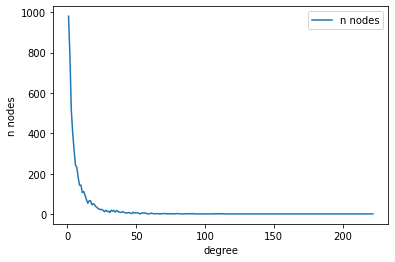

In [ ]:
#PRINT THE NODES NUMBER OF LARGEST CONNECTED COMPONENT
Gcc = sorted(nx.connected_components(G1), key=len, reverse=True)    # Generate a sorted list of connected components, largest first
G0 = G1.subgraph(Gcc[0])                                            # G0 = largest connected component
print(G0)

# degree = list of nodes' degrees
node_degree = G1.degree()
degree = []
for i in node_degree:
  degree.append(i[1])

print("List degree: ", degree)

# Calculate the average degree, useful later
average_degree = np.mean(degree)
print('The empirical average degree is', average_degree)

#CHECK IF THE GRAPH IS SCALE FREE
degree_sorted_list = sorted(degree)
print("Sorted nodes' degree list: ", degree_sorted_list)

dict_d = {}                              #dictionary where the key is the number of degree and value is the number of nodes with those degree
for i in degree_sorted_list:
  if i not in dict_d:
    dict_d[i] = 1
  else:
    dict_d[i] += 1

#show the frequency of nodes' degree
plt.plot(list(dict_d.keys()), list(dict_d.values()), label='n nodes')
plt.xlabel('degree')
plt.ylabel('n nodes')
plt.legend()
plt.show()

# 1. Task1: simulates an epidemic on G using a SIR model, comment on the results


1.   **plot S,I,R dynamics**:
        
        First of all, we use values of gamma and beta of our choice to calculate the SIR dynamics of our Graph (G1). The plot of this dynamics is provided and we have noticed that, increasing the R0 (ratio between beta and gamma), the S,I,R curves are less smooth and present more abrupt changes.
    
2.   **analyze final epidemic size as beta changes when gamma is fixed**:
        
        For each couple ***Beta-Gamma***, above and below the HMF threshold, we run 100 SIR simulations and we save the **epidemic size values** "p_vals" (that are the average of the 100 R_vals = Rinf = R[-1] for each Beta-Gamma) in an array to see their variability.

3.   **study the epidemic threshold**:
        
        ***HMF Threshold*** and ***Delta threshold*** given by the *epidemic variability* (delta) have been calculated.
        
        - The *HMF threshold* is directly dependent of network degrees, so we have calculated it before the study of epidemic size also to choose better the range of beta values.
        
        - The *Delta threshold*, instead, occurs at the maximum of the epidemic variability, so we first have calculated the epidemic size for each Beta-Gamma and, then, we have found the epidemic variability and the beta value for which we can reach the maximum of this epidemic variability.


###*Plot the S,I,R dynamics*

**SIR calculation with gamma and beta of our choice.**

The ***SIR model*** is one of the models for describing the temporal dynamics of an infectious disease in a population.
It divides people into one of three categories:

**S(t)** = Susceptibles: people that can be infected from an infectious disease

**I(t)** = Infected: people infected by a disease

**R(t)** = Recovered: people who have recovered and are no more susceptible

The *output* from a SIR model shows the number (or proportion) of people in each state over time.

---
Variables used:
*   ***gamma*** = recovery rate per node
*   ***beta*** = transmission rate per edge
*   $t_0$   = starting time for the SIR simulation
*   ***tmax*** = ending time for the SIR simulation
*   ***rho*** = initial fraction infected
*   $R_0$ = {beta/gamma} = indicate how contagious an infectious disease is.


In this first trial the rate constants ***beta*** and  ***gamma*** never
change, and so also the reproductive number $R_0$ is constant.



R0 = 44.1998453807499


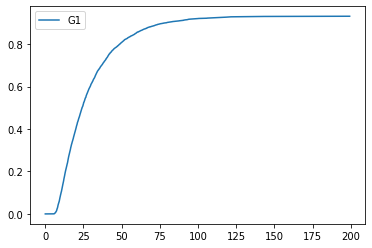

In [ ]:
#SIR calculation with gamma and beta of our choice

gamma = 0.05              # recovery rate per node
beta = 0.25               # transmission rate per edge
t0   = 0                  # starting time for the SIR simulation
tmax = 300                # ending time for the SIR simulation
rho = 1/N                 # initial fraction infected

print(f'R0 = {average_degree*beta/gamma}')

t, S, I, R = EoN.fast_SIR(G1, beta, gamma, rho = rho, tmax = tmax)   # fast SIR simulation --> returns times, S (susceptible),
                                                                      # I (infected), R (recovered, not more reinfectable) as numpy arrays

plt.plot(t, R/N, label="G1")        # evolution in time between the number of recovered and total population,
                                      # this ratio tends to 1, but there is always a number of people that remains susceptible
plt.legend()

**Plot of SIR dynamics**  --> development of people conditions during the spread of the contagious disease

The **basic reproduction number** is
$$R_0 = \beta/\gamma$$

At the **beginning** of the epidemic, on average, **each infected individual infects** other
$$R_0 = \langle k \rangle \beta/\gamma$$  where $\langle k \rangle$ is the average degree.

It tells us the average number of people who will contract a contagious disease from one person with that disease. It is specifically applied to a population of people who were previously free of infection and haven’t been vaccinated.

During the course of the epidemic **S** (number of susceptibles) decreases and **R** (number of recovered) increases.

What happens to **I** (number of infected) is governed by the **effective reproduction number** $R_0*S$ (= average number of new infections for each Recovered). As the number of susceptibles decreases, also this value decreases with time.


*   If  $R_0*S > 1$, the number **I** of infected increases
*   It reaches a peak when  $R_0*S = 1$
*   If  $R_0*S < 1$, the number **I** of infected decreases to zero

Meanwhile, the value of **R** increases to a final value representing the proportion of the population eventually infected and then recovered.



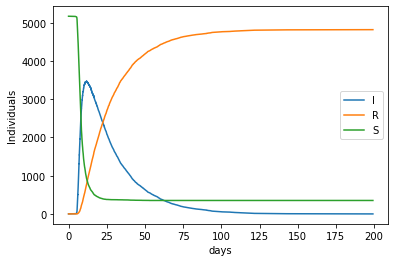

In [ ]:
plt.plot(t, I, label='I')
plt.plot(t, R, label='R')
plt.plot(t, S, label='S')
plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()

In our case, with $R_0 = 44.20$, we can notice that the disease dies out before the end of the simulation (time = 300), but there is a portion of individuals who has never been infected.

### *Theoretical HMF Threshold*

Calculation of HMF threshold using G1 structure --> it's directly dependent of *network degrees* **k**

Setting $\langle \phi \rangle=\frac{\langle k \rangle}{\langle k^2\rangle -\langle k \rangle}$
yields the **exact threshold in continuous time**:
$$\left(\frac{\beta}{\gamma}\right)_c^{HMF} = \frac{\langle k \rangle}{\langle k^2 \rangle - 2\langle k \rangle}$$

In [ ]:
k_mean = average_degree

k_2_mean = np.mean([i*i for i in degree])

print(k_mean)
print(k_2_mean)

HMF_threshold = k_mean/(k_2_mean - 2*k_mean)      # formula of HMF threshold

print("heterogeneous mean-field approach (HMF) threshold: " + str(HMF_threshold) + '\n')

8.83996907614998
267.54696559721685
heterogeneous mean-field approach (HMF) threshold: 0.03537869388588596



### *Analyze the final epidemic size as β changes when γ is fixed*

Now we analyze how the epidemic size changes for different values of **beta** when **gamma is fixed**. Given that the simulations are random process, for each pair of ***beta-gamma*** we will perform 100 simulations. So also the reproductive number  $R_0$ changes every 100 steps.

Structures:
*   **p_vals** = array with epidemic size values (one for each of the 11 simulations) --> mean of the 100 epidemic sizes for each couple beta/gamma
*   **p_2_vals** = array with epidemic size values squared (one for each of the 11 simulations)
*   **R0_vals** = array with the values of R0 (beta/gamma) of each simulation



[1.91, 6.27, 107.79, 732.31, 1492.84, 2116.98, 2733.12, 3211.34, 3656.64, 4497.65, 4605.48]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]


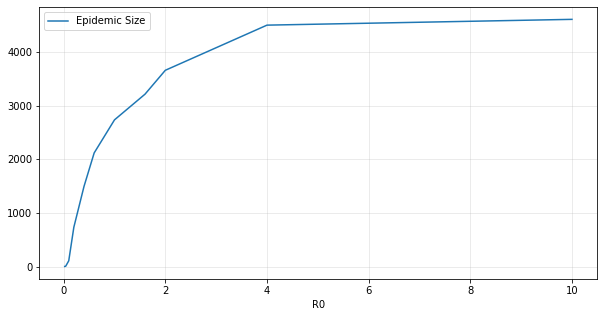

In [ ]:
gamma      = 0.05
beta_vals  = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
avgdeg = sum([d for n,d in G1.degree()])/N

p_vals = []             # epidemic size values (one for each of the 11 simulations) --> mean of the 100 epidemic sizes for each couple beta/gamma
p_2_vals = []           # epidemic size values squared (one for each of the 11 simulations)
R0_vals = []            # contains the values of R0 (beta/gamma) of each simulation

# for each couple Beta-gamma we run 100 SIR simulations
for beta in beta_vals:
    R_vals = []
    for i in range(100):
        t,S,I,R = EoN.fast_SIR(G1, beta, gamma, rho=1/N, tmax = tmax)      # fast SIR simulation
        R_vals.append(R[-1])                                                # Final epidemic size = Rinf = R[-1]
    p_vals.append(sum([j for j in R_vals])/len(R_vals))
    p_2_vals.append(sum([j*j for j in R_vals])/len(R_vals))
    R0_vals.append(beta/gamma)


print(p_vals)
#print(p_2_vals)
print(R0_vals)

plt.figure(figsize=(10,5))
plt.grid(alpha=0.3)
plt.plot(R0_vals, p_vals, label='Epidemic Size')           # plot the epidemic size
plt.xlabel('R0')
plt.legend()


We can see that, when the infection rate is extremely small ($\beta = 0.001$), the initial infected node hasn't transmitted the disease to anyone. This happens because, the only infected patient, managed to heal before being able to infect anyone else.

For an infection rate of $0.5$, we have a peak near the network size (around $4500$), which means that the disease has not spread throughout all the network.

In particular we have that, for the first beta values ($\beta = 0.001$ and $\beta = 0.002$) we do not notice an excessive growth in the number of healed (previously infected). The biggest jump occurs between the beta values of $\beta = 0.005$ and $\beta = 0.01$ for which the infected have risen lots of  times the previous value.

For the subsequent beta values, an initially steeper growth of the epidemic size is noted which then tends to stabilize.

However, the number of healed (and therefore of the infected) does not reach the total of the nodes of the graph, and therefore of the population. This also happened because about 700 nodes of the graph under examination are not connected to the largest connected component.

### *Study the epidemic threshold and compare it with the theoretical one*


**Calculation of delta threshold based on the epidemic size values (p_vals)**

***Epidemic threshold*** indicates the level of incidence above which a disease requires an urgent response. Each disease has a specific threshold that depends on its infectiousness, other determinants of transmission, and the degree to which it is locally endemic.

($\rho$ values and $\rho^2$ values already calculated)

Let $\rho$ be the epidemic size.
We define the **epidemic variability** as
$$\Delta(\beta,\gamma)=\frac{\sqrt{\langle \rho^2\rangle -\langle\rho\rangle^2}}{\langle\rho\rangle}$$
where $\langle\rho\rangle$ and $\langle \rho^2\rangle$ are the average value of $\rho$ and $\rho^2$ for epidemics with the given $\beta$ and $\gamma$.

$\Delta$ is the **coefficient of variation** (or *relative standard deviation*) for the epidemic size.

We say that the **epidemic threshold** occurs at the **maximum of the epidemic variability**:
$$\left(\frac{\beta}{\gamma}\right)_c^{\Delta} = \arg \max \Delta(\beta,\gamma)$$

In [ ]:
epidemic_var = []

for i in range(len(p_vals)):                    # for each p_val, we calculate the corresponding delta value = EPIDEMIC VARIABILITY
    epidemic_var.append(math.sqrt(p_2_vals[i] - (p_vals[i] * p_vals[i]))/p_vals[i])

print(epidemic_var)
print(max(epidemic_var))

max_beta_idx = epidemic_var.index(max(epidemic_var))          # find the maximum value of delta (MAXIMUM EPIDEMIC VARIABILITY) and
max_beta = beta_vals[max_beta_idx]              # the associated value of beta
#print(max_beta)


print("Gamma-beta values for maximum of the epidemic variability: " + str(gamma) + ", " + str(max_beta))

[2.3717855360896873, 4.037252856340387, 2.508831363256337, 1.3598396830441202, 1.0406908767961514, 0.8329721491657429, 0.7013798805527768, 0.6079053543811612, 0.4842241706870488, 0.25264733570119796, 0.27427543877655025]
4.037252856340387
Gamma-beta values for maximum of the epidemic variability: 0.05, 0.002


**Calculation of average trasmissibility for each couple beta/gamma**

In the control of a novel pandemic, is important to know how easily the disease will spread from an infected person to a susceptible person, so ***how transmissible the disease is***. Transmissibility is determined by the infectivity of the pathogen, the contagiousness of the infected individual, the susceptibility of the other individuals, the contact between the infected individual and the exposed individual, and the environmental stress exerted on the pathogen during transmission.

$$average.trasmissibility = \frac{1}{1 + \frac{\beta}{\gamma}}$$

In [ ]:
# calculation of average trasmissibility (formula: 1/(1+(gamma/beta)))

average_trasmissibility = []

for i in beta_vals:
  average_trasmissibility.append(1/(1+(gamma/i)))

print(average_trasmissibility)

[0.0196078431372549, 0.038461538461538464, 0.09090909090909091, 0.16666666666666666, 0.2857142857142857, 0.37499999999999994, 0.5, 0.6153846153846154, 0.6666666666666666, 0.8, 0.9090909090909091]


**PLOT OF EPIDEMIC SIZE and VARIABILITY with THRESHOLDS**

[0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]
0.04


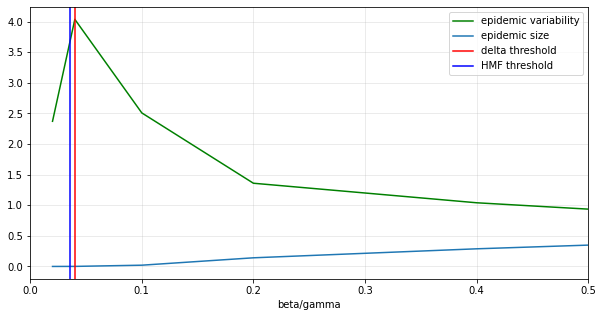

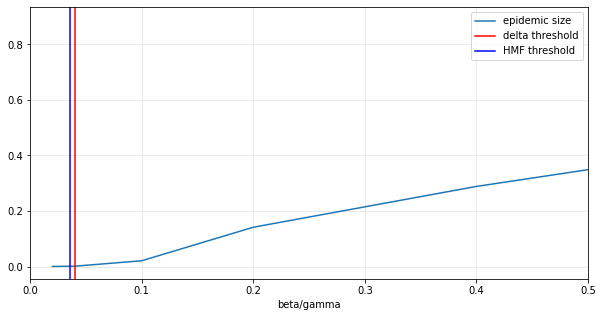

In [ ]:
print(beta_vals)
x = [beta/gamma for beta in beta_vals]
print(x)
print(max_beta/gamma)

plt.figure(figsize=(10,5))
plt.plot(x, epidemic_var, label='epidemic variability', color='g')
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

Here we can see graphically that the **epidemic threshold** occurs at the **maximum of the epidemic variability**.

This estimate is close to the threshold obtained with the HMF approach (HMF = $0.0354$, epidemic threshold = $0.04$), so the two estimates are compatible with each other.

# 2. Task2: modify the network and repeat Task1, comment on the differences
    
From G (our graph), generate a random network using:
- 2.1.1 the Configuration Model (CM)
- 2.1.2 the Erdos Renyi model


**Configuration Model (CM)**:
To generate a random network with Configuration Model we use a function of networkx library *configuration_model(deg_seq)*.
It returns a random graph with the given degree sequence, taken by our initial graph G1. The average degree of the two graph are equal.

The configuration model generates a random pseudograph (graph with parallel edges and self loops) by randomly assigning edges to match the given degree sequence.

Descriptions and comparisons are present within the code.


**Erdos Renyi model**:
To generate a random network with Erdos Renyi Model we use a function of networkx library *erdos_renyi_graph(N, p)*, where **N** is the number of nodes and **p** is the probability that each edge exists.

$$p = \frac{\langle k \rangle}{N-1}$$

It returns a random graph with edges that are identically distributed with probability **p**. The average degree of this graph is different from the previous ones.

### Configuration Model (CM)

**Generation of random network using Configuration Model based on sequential degree of our graph**

In [ ]:
deg_seq = [v for k,v in G1.degree()]
CM = nx.configuration_model(deg_seq)

**SIR calculation with gamma and beta of our choice**

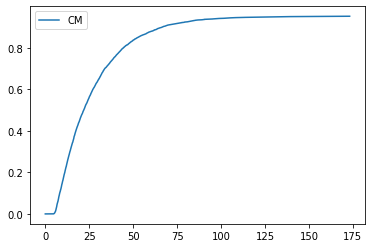

In [ ]:
gamma = 0.05
beta = 0.25
t0   = 0
tmax = 300

t2,S2,I2,R2 = EoN.fast_SIR(CM, beta, gamma, rho=1/N, tmax = tmax)

plt.plot(t2, R2/N, label="CM")
plt.legend()

**Plot of SIR dynamics**

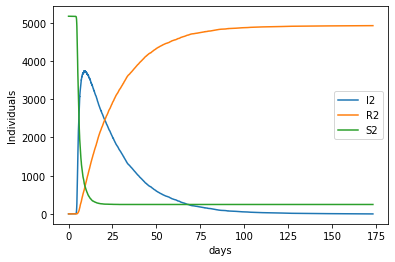

In [ ]:
plt.plot(t2, I2, label='I2')
plt.plot(t2, R2, label='R2')
plt.plot(t2, S2, label='S2')
plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()

Here we can notice slight changes in the peak of Infected, which approaches the value of $4000$, and in the curve of the Susceptible which is reaching the zero value towards the end of the simulation.

**Calculation of HMF threshold using CM structure**

In [ ]:
k_mean = average_degree

k_2_mean = np.mean([i*i for i in degree])

print(k_mean)
print(k_2_mean)

HMF_threshold = k_mean/(k_2_mean - 2*k_mean)

print("heterogeneous mean-field approach (HMF) threshold: " + str(HMF_threshold) + '\n')

8.83996907614998
267.54696559721685
heterogeneous mean-field approach (HMF) threshold: 0.03537869388588596



**Plot of epidemic size curve with beta changes (above and below the HMF threshold) when gamma is fixed**

[1.47, 6.38, 367.67, 894.02, 2147.48, 2175.39, 2972.72, 3440.29, 4127.51, 4521.42, 4806.24]
[8.95, 751.9, 539014.75, 2280242.28, 7435690.1, 8447362.45, 12805035.68, 15778968.91, 19358608.07, 22220163.62, 24315286.72]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]


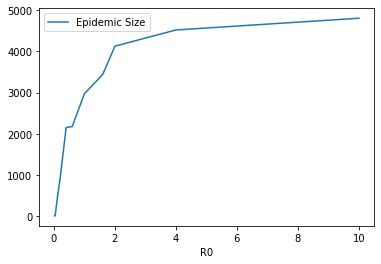

In [ ]:
gamma      = 0.05
beta_vals  = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
avgdeg = sum([d for n,d in CM.degree()])/N

p_vals = []
p_2_vals = []
R0_vals = []

for beta in beta_vals:
    R_vals = []
    for i in range(100):
        t,S,I,R = EoN.fast_SIR(CM, beta, gamma, rho=1/N, tmax = tmax)
        R_vals.append(R[-1])  # Final epidemic size = Rinf = R[-1]
    p_vals.append(sum([j for j in R_vals])/len(R_vals))
    p_2_vals.append(sum([j*j for j in R_vals])/len(R_vals))
    R0_vals.append(beta/gamma)


print(p_vals)
print(p_2_vals)
print(R0_vals)

plt.figure(figsize=(10,5))
plt.grid(alpha=0.3)
plt.plot(R0_vals, p_vals, label='Epidemic Size')           # plot the epidemic size
plt.xlabel('R0')
plt.legend()

**Calculation of delta threshold based on the epidemic size values (p_vals)**

In [ ]:
epidemic_var = []

for i in range(len(p_vals)):                    # for each p_val, we calculate the corresponding delta value = EPIDEMIC VARIABILITY
    epidemic_var.append(math.sqrt(p_2_vals[i] - (p_vals[i] * p_vals[i]))/p_vals[i])

print(epidemic_var)
print(max(epidemic_var))

max_beta_idx = epidemic_var.index(max(epidemic_var))          # find the maximum value of delta (MAXIMUM EPIDEMIC VARIABILITY) and
max_beta = beta_vals[max_beta_idx]              # the associated value of beta
print(max_beta)


print("Gamma-beta values for maximum of the epidemic variability: " + str(gamma) + ", " + str(max_beta))

[1.77251030223533, 4.179976612269817, 1.7283949461011, 1.3612126370633306, 0.7825367403605705, 0.886022327117626, 0.6700855705800333, 0.5772167306773188, 0.36920549276497194, 0.2948218545589168, 0.22937396303274016]
4.179976612269817
0.002
Gamma-beta values for maximum of the epidemic variability: 0.05, 0.002


[0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]
0.04


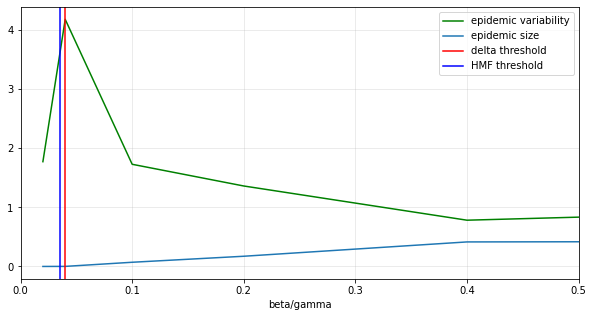

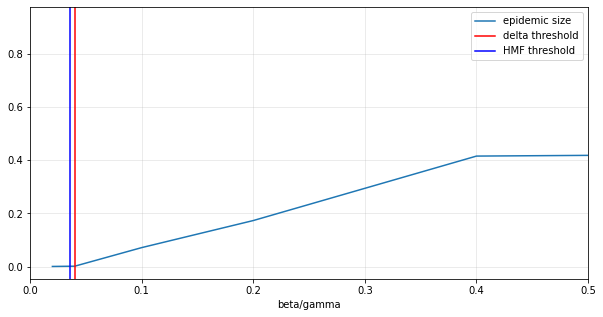

In [ ]:
print(beta_vals)
x = [beta/gamma for beta in beta_vals]
print(x)
print(max_beta/gamma)

plt.figure(figsize=(10,5))
plt.plot(x, epidemic_var, label='epidemic variability', color='g')
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

Looking at the graphs, we can notice that there are no substantial differences between this network and the original one both from the point of view of the epidemic size both from the thresholds (which have remained unchanged).
This because the two networks have **the same average degree distribution of the edges**, but randomized.

### Erdos Renyi model

**Generation of random network using Erdos Renyi model**

the empirical average degree is 8.824120603015075
[(2293, 0), (1146, 1), (1375, 1), (2503, 1), (2673, 1), (4402, 1), (4842, 1), (73, 2), (191, 2), (232, 2), (402, 2), (518, 2), (628, 2), (662, 2), (795, 2), (909, 2), (1265, 2), (1328, 2), (1528, 2), (1652, 2), (2254, 2), (2396, 2), (2656, 2), (2720, 2), (2800, 2), (3083, 2), (3115, 2), (3344, 2), (3474, 2), (3777, 2), (3806, 2), (3853, 2), (3899, 2), (4043, 2), (4241, 2), (4349, 2), (4710, 2), (4727, 2), (4844, 2), (4946, 2), (5105, 2), (68, 3), (75, 3), (171, 3), (186, 3), (193, 3), (215, 3), (252, 3), (266, 3), (321, 3), (640, 3), (679, 3), (729, 3), (743, 3), (780, 3), (782, 3), (792, 3), (826, 3), (948, 3), (1031, 3), (1088, 3), (1123, 3), (1130, 3), (1163, 3), (1281, 3), (1295, 3), (1325, 3), (1332, 3), (1511, 3), (1545, 3), (1737, 3), (1810, 3), (1922, 3), (2057, 3), (2141, 3), (2161, 3), (2345, 3), (2348, 3), (2352, 3), (2389, 3), (2495, 3), (2509, 3), (2548, 3), (2576, 3), (2606, 3), (2611, 3), (2631, 3), (2664, 3), (2694, 3), 

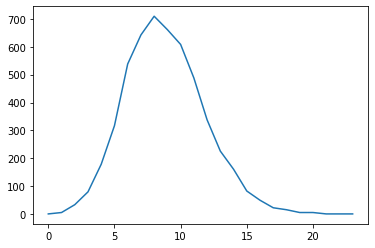

In [ ]:
avg_deg = np.mean([degree for node, degree in G1.degree()])
N = G1.number_of_nodes()

p = avg_deg / (N - 1)       #probability

ER = nx.erdos_renyi_graph(N, p)

node_degreeER = ER.degree()
degreeER = []
for i in node_degreeER:
  degreeER.append(i[1])

#print(degreeER)
average_degreeER = np.mean(degreeER)
print('the empirical average degree is', average_degreeER)

# CHECK IF THE GRAPH IS SCALE FREE ---> NO
l = list(node_degreeER)
sorted_list = sorted(l, key=lambda x: x[1])

print(sorted_list)

dict_d = {}
for i in sorted_list:
  if i[1] not in dict_d:
    dict_d[i[1]] = 1
  else:
    dict_d[i[1]] += 1

print(dict_d)

plt.plot(list(dict_d.keys()), list(dict_d.values()), label='n nodi')
plt.show()

**Degree distribution of our graph versus degree distribution of the associated poisson**

the degree distribution with a Poisson fit looks like this:


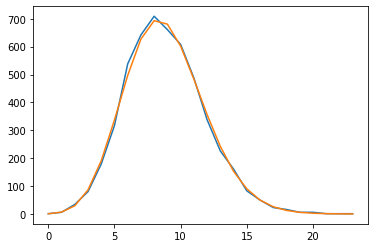

In [ ]:
c = (N-1)*p
# poisson distribution data
max_degree = sorted_list[-1][1]
x = np.arange(0, max_degree+1, 1)
y = poisson.pmf(x, mu=c)
print('the degree distribution with a Poisson fit looks like this:')
#plt.hist(degree, bins=x)
plt.plot(list(dict_d.keys()), list(dict_d.values()), label='n nodes')
plt.plot(x,[N*t for t in y])
plt.show()

**SIR calculation with gamma and beta of our choice**

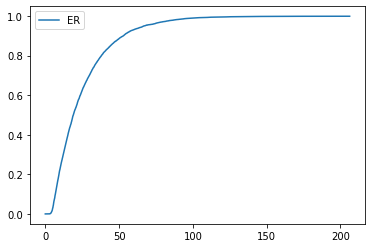

In [ ]:
gamma = 0.05
beta = 0.25
t0   = 0
tmax = 300

t3,S3,I3,R3 = EoN.fast_SIR(ER, beta, gamma, rho=1/N, tmax = tmax)

plt.plot(t3, R3/N, label="ER")

plt.legend()

**Plot of SIR dynamics**

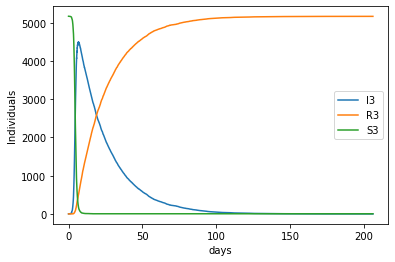

In [ ]:
plt.plot(t3, I3, label='I3')
plt.plot(t3, R3, label='R3')
plt.plot(t3, S3, label='S3')
plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()

Here we can note important variations in the **peak of the Infected**, which reachs almost the total population and in the **curves of the Susceptible and Recovered**, which reach respectively almost zero and the maximum number of people.

**Calculation of HMF threshold using G1 structure**

In [ ]:
k_mean = average_degreeER

k_2_mean = np.mean([i*i for i in degreeER])

print(k_mean)
print(k_2_mean)

HMF_threshold = k_mean/(k_2_mean - 2*k_mean)

print("heterogeneous mean-field approach (HMF) threshold: " + str(HMF_threshold) + '\n')

8.824120603015075
86.68457672980286
heterogeneous mean-field approach (HMF) threshold: 0.12781849639131676



**Plot of epidemic size curve with beta changes (above and below the HMF threshold) when gamma is fixed**

[1.12, 1.31, 4.14, 705.56, 3195.69, 3670.73, 4802.26, 4789.78, 4746.71, 5014.5, 5120.31]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]


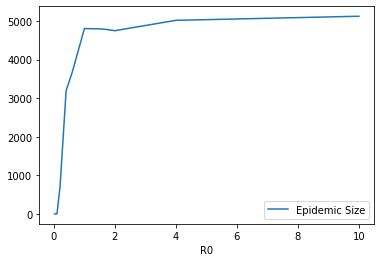

In [ ]:
gamma      = 0.05
beta_vals  = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
avgdeg = sum([d for n,d in ER.degree()])/N

p_vals = []
p_2_vals = []
R0_vals = []

for beta in beta_vals:
    R_vals = []
    for i in range(100):
        t,S,I,R = EoN.fast_SIR(ER, beta, gamma, rho=1/N, tmax = tmax)
        R_vals.append(R[-1])  # Final epidemic size = Rinf = R[-1]
    p_vals.append(sum([j for j in R_vals])/len(R_vals))
    p_2_vals.append(sum([j*j for j in R_vals])/len(R_vals))
    R0_vals.append(beta/gamma)


print(p_vals)
#print(p_2_vals)
print(R0_vals)


plt.figure(figsize=(10,5))
plt.grid(alpha=0.3)
plt.plot(R0_vals, p_vals, label='Epidemic Size')           # plot the epidemic size
plt.xlabel('R0')
plt.legend()

When the infection rate is extremely small ($\beta = 0.001$ and $\beta = 0.002$), the initial infected node hasn't transmitted the disease to anyone. This happens because, the only infected patient, managed to heal before being able to infect anyone else.

The biggest jumps occurs between the beta values of $\beta = 0.005$ / $\beta = 0.01$ and $\beta = 0.01$ / $\beta = 0.02$ for which the infected have risen lots of  times the previous value.

For an infection rate of $\beta = 0.5$, we have a peak near the network size (around $5100$), which means that the disease has spread almost throughout the network.

**Calculation of delta threshold based on the epidemic size values (p_vals)**

In [ ]:
epidemic_var = []

for i in range(len(p_vals)):                    # for each p_val, we calculate the corresponding delta value = EPIDEMIC VARIABILITY
    epidemic_var.append(math.sqrt(p_2_vals[i] - (p_vals[i] * p_vals[i]))/p_vals[i])

print(epidemic_var)
print(max(epidemic_var))

max_beta_idx = epidemic_var.index(max(epidemic_var))          # find the maximum value of delta (MAXIMUM EPIDEMIC VARIABILITY) and
max_beta = beta_vals[max_beta_idx]              # the associated value of beta
print(max_beta)


print("Gamma-beta values for maximum of the epidemic variability: " + str(gamma) + ", " + str(max_beta))

[0.3164293776190952, 0.4667737632430669, 1.7634570758493355, 1.5165598598059409, 0.6699813622833695, 0.5925560338625028, 0.25259811553711625, 0.2742959667678657, 0.2948069189025758, 0.17582838733611814, 0.10048433139799785]
1.7634570758493355
0.005
Gamma-beta values for maximum of the epidemic variability: 0.05, 0.005


[0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]
0.09999999999999999


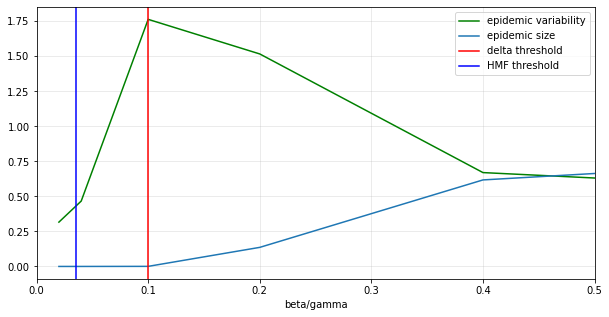

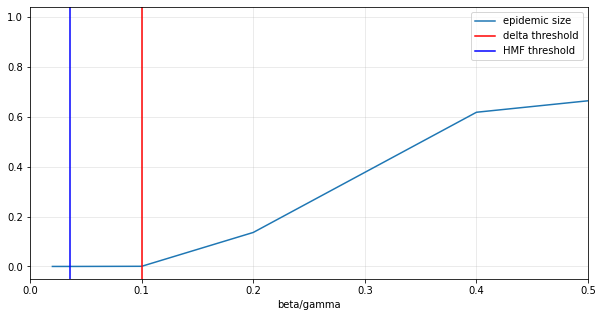

In [ ]:
print(beta_vals)
x = [beta/gamma for beta in beta_vals]
print(x)
print(max_beta/gamma)

plt.figure(figsize=(10,5))
plt.plot(x, epidemic_var, label='epidemic variability', color='g')
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

Compared to the previous graphs, we can see a greater distance between the values of the two thresholds (theoretical [HMF] and epidemic [Delta]).

However, the error between the two remains less than 1/10:
*   HMF threshold = 0.0354
*   Epidemic threshold = 0.09999999



# 3. Task3: immunize part of the population (with two different strategies), repeat Task1

Choose a subset of individuals and set them as permanently immunized.

Modalities:
 - random
 - [3.A] betwenness
 - AD THEN Set these individuals as permanently immunized and repeat Task1

### RANDOM CHOICE

**Random sample N nodes from the graph**

In [ ]:
random_nodes = sample(list(G1.nodes()), 1000)

In [ ]:
print(random_nodes)

[4197, 2691, 2105, 376, 4395, 4285, 4014, 241, 741, 1155, 205, 3958, 2950, 3337, 4762, 1781, 478, 3061, 1651, 1225, 5047, 3771, 871, 1077, 3718, 2698, 2090, 5147, 3774, 3861, 1072, 4043, 1765, 497, 5161, 208, 3401, 872, 4349, 2924, 1117, 5059, 4318, 670, 2146, 3266, 2202, 1470, 3474, 2431, 3174, 751, 3449, 5079, 3616, 786, 840, 4083, 2506, 704, 2355, 1353, 2358, 2226, 3068, 2348, 2484, 4576, 3985, 2444, 4128, 2454, 1851, 4672, 2845, 1230, 2773, 4709, 4010, 510, 3318, 857, 685, 1595, 4929, 668, 3916, 3376, 671, 4459, 1466, 1014, 2564, 4952, 3439, 3497, 1297, 3164, 1827, 2673, 828, 3758, 4235, 167, 4865, 1478, 3998, 1023, 1586, 353, 4498, 203, 231, 2234, 3517, 4008, 3374, 1103, 3214, 2751, 4871, 4122, 2741, 4332, 3743, 5027, 2368, 2613, 2875, 3961, 4254, 4257, 2992, 680, 584, 2922, 525, 3597, 4373, 2406, 3, 2721, 2535, 4415, 904, 3628, 4986, 2071, 2112, 540, 3115, 2640, 2688, 4913, 4799, 2539, 2037, 5050, 2793, 4452, 346, 2711, 4662, 4639, 893, 4142, 2540, 238, 3592, 2012, 3919, 334, 192

**SIR calculation with gamma and beta of our choice**

R0 = 5.0


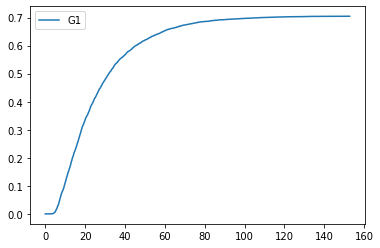

In [ ]:
gamma = 0.05
beta = 0.25
tmin   = 0
tmax = 300

print(f'R0 = {beta/gamma}')

tr,Sr,Ir,Rr = EoN.fast_SIR(G1, beta, gamma, initial_recovereds=random_nodes, tmin = tmin, tmax=tmax)

plt.plot(tr, Rr/N, label="G1")

plt.legend()

**Plot of SIR dynamics**

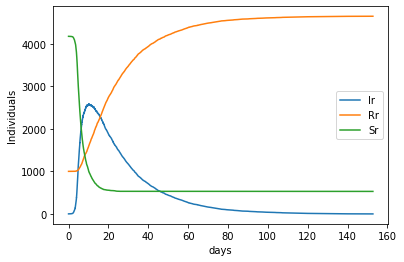

In [ ]:
plt.plot(tr, Ir, label='Ir')
plt.plot(tr, Rr+1000, label='Rr')
plt.plot(tr, Sr-1000, label='Sr')
plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()

Here we can see that, since there are already **1000 immunized people**, the Recovered people start from this value and, likewise, the Susceptible ones start from a lower value (equal to $4174$).

The curve of the Infected has the same trend as in the previous situations, but obviously reaches a lower peak (it does not reach $3000$ individuals).

**Calculation of HMF threshold using G1 structure**

In [ ]:
k_mean = average_degree

k_2_mean = np.mean([i*i for i in degree])

print(k_mean)
print(k_2_mean)

HMF_threshold = k_mean/(k_2_mean - 2*k_mean)

print("heterogeneous mean-field approach (HMF) threshold: " + str(HMF_threshold) + '\n')

8.83996907614998
267.54696559721685
heterogeneous mean-field approach (HMF) threshold: 0.03537869388588596



**Plot of epidemic size curve with beta changes (above and below the HMF threshold) when gamma is fixed**

[1.26, 1.16, 56.5, 227.52, 772.31, 1151.8, 1605.6, 1589.64, 2044.46, 2247.37, 2450.31]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]


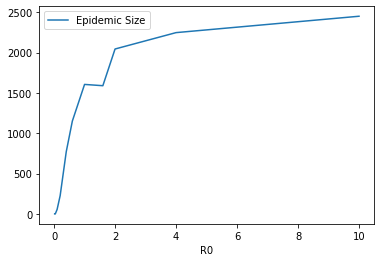

In [ ]:
gamma      = 0.05
beta_vals  = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
avgdeg = sum([d for n,d in G1.degree()])/N

p_vals = []
p_2_vals = []
R0_vals = []

for beta in beta_vals:
    R_vals = []
    for i in range(100):
        t,S,I,R = EoN.fast_SIR(G1, beta, gamma, initial_recovereds=random_nodes, tmin = tmin, tmax=tmax)
        if len(R) == 0:
          R_vals.append(0)
        else:
          R_vals.append(R[-1])  # Final epidemic size = Rinf = R[-1]
    p_vals.append(sum([j for j in R_vals])/len(R_vals))
    p_2_vals.append(sum([j*j for j in R_vals])/len(R_vals))
    R0_vals.append(beta/gamma)


print(p_vals)
#print(p_2_vals)
print(R0_vals)

plt.figure(figsize=(10,5))
plt.grid(alpha=0.3)
plt.plot(R0_vals, p_vals, label='Epidemic Size')           # plot the epidemic size
plt.xlabel('R0')
plt.legend()

When the infection rate is extremely small ($\beta = 0.001$ and $\beta = 0.002$), the initial infected node hasn't transmitted the disease to anyone. This happens because, the only infected patient, managed to heal before being able to infect anyone else.

The biggest jumps occurs between the beta values of $\beta = 0.002$ / $\beta = 0.005$ and $\beta = 0.005$ / $\beta = 0.01$ for which the infected have risen lots of  times the previous value.

For an infection rate of $0.5$, we have the peak (around $2400$), because of the presence of the 1000 immunized.

**Calculation of delta threshold based on the epidemic size values (p_vals)**

In [ ]:
epidemic_var = []

for i in range(len(p_vals)):                    # for each p_val, we calculate the corresponding delta value = EPIDEMIC VARIABILITY
    epidemic_var.append(math.sqrt(p_2_vals[i] - (p_vals[i] * p_vals[i]))/p_vals[i])

print(epidemic_var)
print(max(epidemic_var))

max_beta_idx = epidemic_var.index(max(epidemic_var))          # find the maximum value of delta (MAXIMUM EPIDEMIC VARIABILITY) and
max_beta = beta_vals[max_beta_idx]                            # the associated value of beta
print(max_beta)


print("Gamma-beta values for maximum of the epidemic variability: " + str(gamma) + ", " + str(max_beta))

[2.0653837482934714, 0.9883386653770012, 2.415126450962868, 2.030574494884694, 1.3303900874879544, 1.105240153414154, 0.9222185000661004, 1.019355373084428, 0.7991995892928698, 0.7661983996578278, 0.7176712328104377]
2.415126450962868
0.005
Gamma-beta values for maximum of the epidemic variability: 0.05, 0.005


[0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]
0.09999999999999999


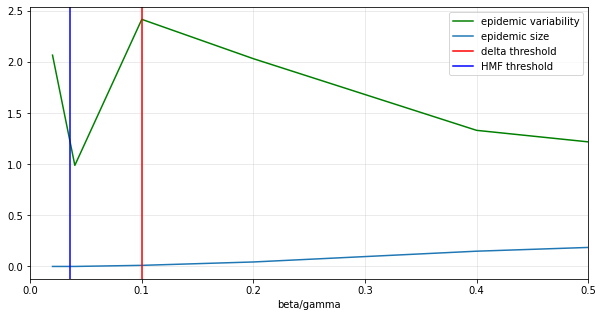

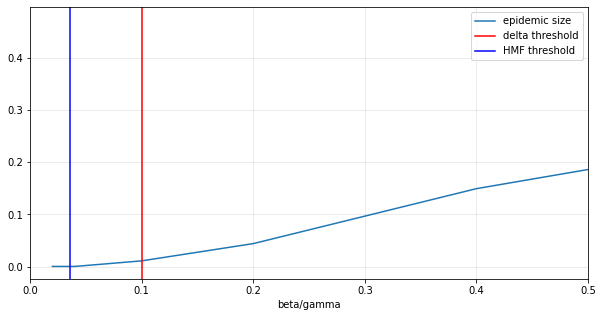

In [ ]:
print(beta_vals)
x = [beta/gamma for beta in beta_vals]
print(x)
print(max_beta/gamma)

plt.figure(figsize=(10,5))
plt.plot(x, epidemic_var, label='epidemic variability', color='g')
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

Compared to the previous graphs, we can see a greater distance between the values of the two thresholds (theoretical [HMF] and epidemic [Delta]).

However, the error between the two remains less than 1/10:
*   HMF threshold = 0.0354
*   Epidemic threshold = 0.09999999


### Using BETWENNESS CENTRALITY

**Calculation of betweenness centrality for each node in graph G1**
-->  betweenness centrality for each vertex is the number of the shortest paths that pass through the vertex.

In [ ]:
dict_nodes = nx.betweenness_centrality(G1, k=None, normalized=True)

print(dict_nodes)

{0: 0.00017722000827841974, 4484: 0.00044730549744897253, 2678: 0.00015085558744960142, 4361: 0.00021723167020884485, 3971: 0.00930706515415457, 898: 0.00010427952265043512, 3435: 0.003809479486373314, 2343: 0.0007121619077491419, 3177: 0.0037761663684526426, 2408: 0.00036221156497801417, 1602: 0.0017653903724527762, 4101: 0.01438738146495107, 759: 0.0018401932769990333, 834: 0.002390442468097048, 4316: 0.0010823139989451255, 3647: 0.0001818451913777051, 1: 9.343953172171062e-05, 3875: 0.0004670986511889633, 2139: 0.001262578347361966, 830: 0.0005684511504436086, 451: 0.03524623553010693, 1400: 0.00017619971546902925, 3316: 0.002545793972452972, 5018: 0.009223308105739146, 2: 0.00028917680169474806, 1832: 0.012050702979379187, 392: 0.01291677040642725, 3522: 0.0012908199474626774, 2369: 0.0009313802684520003, 4772: 0.000522532089865412, 664: 0.0030663501786886657, 1729: 0.0016868362357625151, 3: 0.0, 1481: 0.002860008570719997, 4: 0.00015395190313993148, 2053: 0.0027676014231648957, 15

**Selection of the first 500 nodes that have betweenness centrality different from zero, from the one with greater betwennes value**

In [ ]:
betweenness_nodes = []
betweenness_strings = []
values_centrality = []


key_values = sorted(dict_nodes.items(), key = lambda x: x[1], reverse = True)

k = 0
for key, value in key_values:
  if k < 500:
    betweenness_nodes.append(key)
    betweenness_strings.append(str(key))
    values_centrality.append(value)
    k += 1


print(len(betweenness_nodes))
print(betweenness_nodes)
print(betweenness_strings)
print(values_centrality)

500
[5078, 3537, 1787, 4036, 4439, 15, 1616, 451, 1925, 383, 4445, 2360, 1142, 3859, 1816, 3137, 1378, 1141, 3153, 3847, 4275, 1590, 564, 1272, 519, 2715, 4458, 1745, 207, 173, 5154, 4946, 2392, 2539, 4651, 4897, 2561, 4749, 4024, 3921, 2637, 2103, 1185, 5140, 3230, 4101, 2568, 1689, 4395, 2286, 5172, 78, 3751, 97, 2720, 1826, 2161, 1242, 548, 392, 2845, 137, 2355, 631, 1832, 3343, 4181, 2961, 933, 3172, 3965, 4208, 3862, 3216, 2063, 4350, 2067, 1553, 4731, 3915, 931, 3494, 1255, 2130, 2690, 2543, 4722, 1867, 595, 2016, 2696, 3971, 5018, 799, 62, 3397, 2933, 2966, 1149, 470, 2862, 900, 2881, 3268, 3284, 3032, 934, 2092, 1236, 1440, 3020, 4369, 2325, 1380, 4999, 4637, 987, 157, 2822, 80, 3580, 1027, 2345, 1755, 3593, 4052, 2673, 2382, 4848, 3300, 3101, 4071, 1120, 2307, 2655, 3073, 4269, 2585, 4475, 1592, 2024, 101, 2009, 1155, 4514, 5100, 3222, 339, 1197, 4921, 3219, 4491, 215, 838, 880, 4003, 932, 117, 640, 2773, 4224, 1828, 202, 3296, 1859, 4626, 2859, 3193, 4709, 4735, 494, 3943, 86

**Plot the centrality of the previous selected nodes**

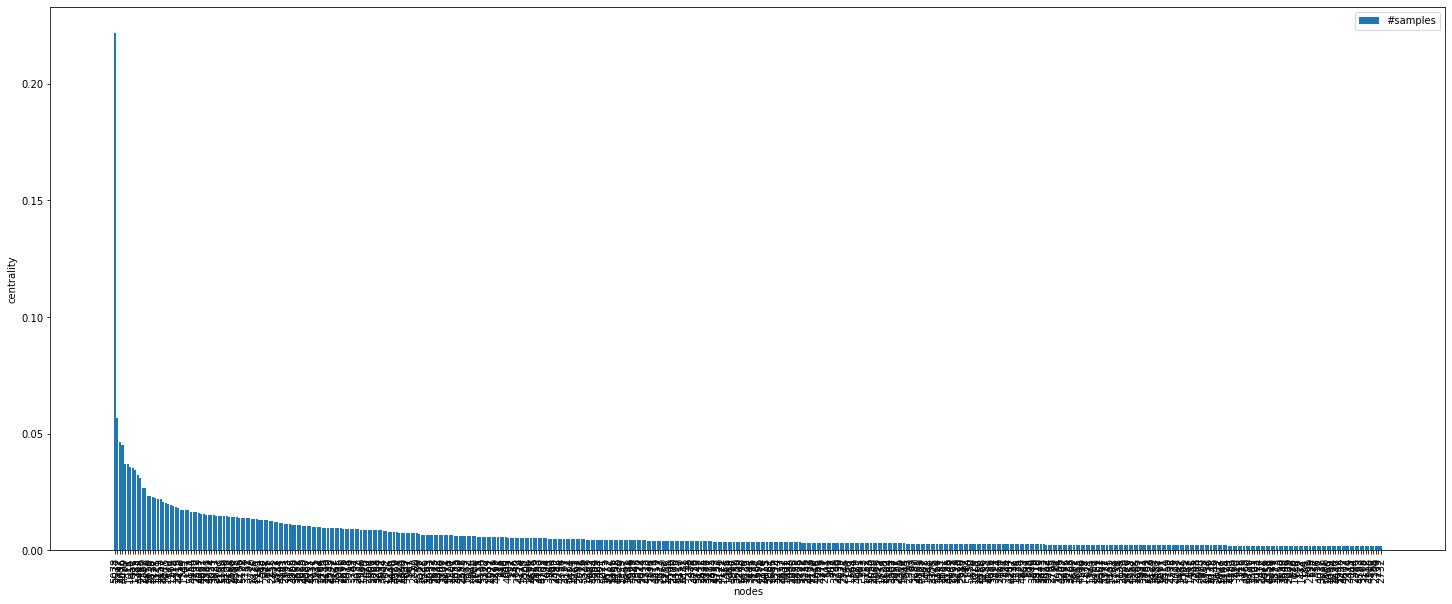

In [ ]:
fig = plt.figure(figsize=(25,10))
plt.bar(betweenness_strings, values_centrality, label = "#samples")
plt.xticks(rotation=90)
plt.xlabel("nodes")
plt.ylabel("centrality")
plt.legend()
plt.show()

We can notice that only one node (5078) has an high centrality value ($0.22$), so this node is maybe the most important for the development of the epidemic.


**SIR calculation with gamma and beta of our choice**

R0 = 5.0


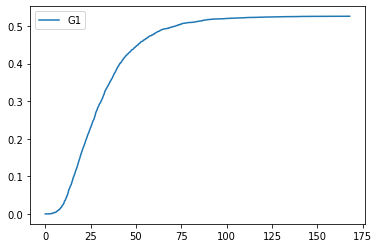

In [ ]:
gamma = 0.05
beta = 0.25
tmin   = 0
tmax = 300

print(f'R0 = {beta/gamma}')

tb,Sb,Ib,Rb = EoN.fast_SIR(G1, beta, gamma, initial_recovereds=betweenness_nodes, tmin=tmin, tmax=tmax)

plt.plot(tb, Rb/N, label="G1")

plt.legend()

**Plot of SIR dynamics**

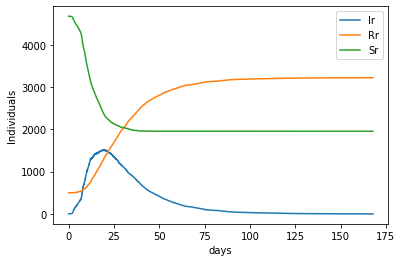

In [ ]:
plt.plot(tb, Ib, label='Ir')
plt.plot(tb, Rb+500, label='Rr')
plt.plot(tb, Sb-500, label='Sr')
plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()

Previously 1000 among the most central nodes of the network had been selected as immunized, but in that case no development of the epidemic was present (the epidemic curves of I, R and S were all flat).

By setting their value to 500, however, we note that the curves are in any case lower than in previous simulations, but consistent with the fact that part of the most connected population is immunized.

**Calculation of HMF threshold using G1 structure**

In [ ]:
k_mean = average_degree

k_2_mean = np.mean([i*i for i in degree])

print(k_mean)
print(k_2_mean)

HMF_threshold = k_mean/(k_2_mean - 2*k_mean)

print("heterogeneous mean-field approach (HMF) threshold: " + str(HMF_threshold) + '\n')

8.83996907614998
267.54696559721685
heterogeneous mean-field approach (HMF) threshold: 0.03537869388588596



**Plot of epidemic size curve with beta changes (above and below the HMF threshold) when gamma is fixed**

[0.94, 0.96, 2.92, 17.63, 65.41, 204.08, 453.36, 876.97, 1151.98, 1503.51, 1813.02]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]


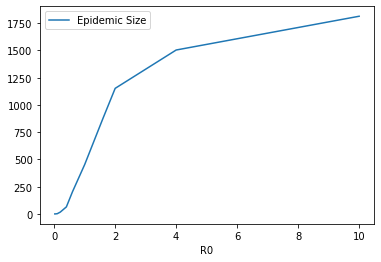

In [ ]:
gamma      = 0.05
beta_vals  = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
avgdeg = sum([d for n,d in G1.degree()])/N

p_vals = []
p_2_vals = []
R0_vals = []

for beta in beta_vals:
    R_vals = []
    for i in range(100):
        t,S,I,R = EoN.fast_SIR(G1, beta, gamma, initial_recovereds=betweenness_nodes, tmin=tmin, tmax=tmax)
        if len(R) == 0:
          R_vals.append(0)
        else:
          R_vals.append(R[-1])  # Final epidemic size = Rinf = R[-1]
    p_vals.append(sum([j for j in R_vals])/len(R_vals))
    p_2_vals.append(sum([j*j for j in R_vals])/len(R_vals))
    R0_vals.append(beta/gamma)


print(p_vals)
#print(p_2_vals)
print(R0_vals)

plt.plot(R0_vals, p_vals, label='Epidemic Size')
plt.xlabel('R0')
plt.legend()


Like the previous cases, we notice a development of the epidemic only for beta values higher than $0.005$.
The peak of infected and then recovered patients is just over 1800, a much lower value than before.

**Calculation of delta threshold based on the epidemic size values (p_vals)**


In [ ]:
epidemic_var = []

for i in range(len(p_vals)):                    # for each p_val, we calculate the corresponding delta value = EPIDEMIC VARIABILITY
    epidemic_var.append(math.sqrt(p_2_vals[i] - (p_vals[i] * p_vals[i]))/p_vals[i])

print(epidemic_var)
print(max(epidemic_var))

max_beta_idx = epidemic_var.index(max(epidemic_var))          # find the maximum value of delta (MAXIMUM EPIDEMIC VARIABILITY) and
max_beta = beta_vals[max_beta_idx]              # the associated value of beta
print(max_beta)


print("Gamma-beta values for maximum of the epidemic variability: " + str(gamma) + ", " + str(max_beta))

[0.5386803787732835, 0.75, 3.5127972888631107, 2.9602715849155223, 2.5577728291547777, 1.8922455031510972, 1.5961950776730933, 1.2375110706415402, 1.053154617393284, 0.9187698578595355, 0.8134460915718246]
3.5127972888631107
0.005
Gamma-beta values for maximum of the epidemic variability: 0.05, 0.005


[0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]
0.09999999999999999


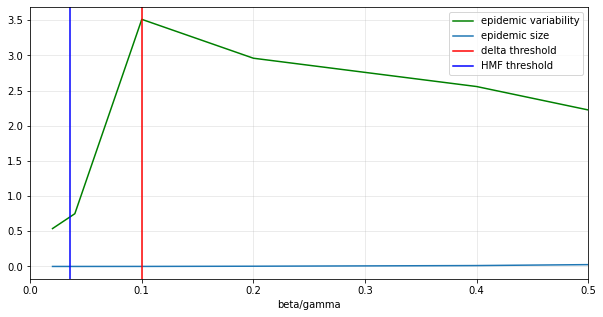

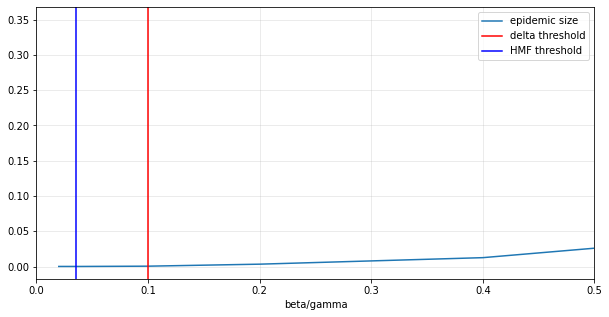

In [ ]:
print(beta_vals)
x = [beta/gamma for beta in beta_vals]
print(x)
print(max_beta/gamma)

plt.figure(figsize=(10,5))
plt.plot(x, epidemic_var, label='epidemic variability', color='g')
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

Compared to the previous graph, we can see the same two thresholds (theoretical [HMF] and epidemic [Delta]).

The error between the two remains less than 1/10:
*   HMF threshold = 0.0354
*   Epidemic threshold = 0.09999999

# 4. Task4: change the epidemic model and comment on the differences
1. instead of using a constant infectivity for all nodes, assign the infectivity to each individual from a probability distribution and repeat Task1; use the following three distributions:
  - gaussian
  - power-law
  - uniform (0,1)

**Transform G1 in direct graph because, in this way, every node will have an infectivity value associated to each edge starting from it**

In [ ]:
dG = G1.to_directed()

print(dG)

DiGraph with 5174 nodes and 45730 edges


### Gaussian

**Generation of N weights (one for each node) using Gaussian distribution**

In [ ]:
weights = np.random.normal(3,4,5174)             #<= mean = 3, variance = 4
print(weights)

[ 0.53100705  5.65190974  2.640059   ...  4.45978393 -1.47400544
 -1.87287881]


**Creation of a dictionary with keys = edge (i,j) and values = weight of the first node of the edge**

In [ ]:
dict_weights = {}

for i,j in dG.edges():
  dict_weights[(i,j)] = weights[i]
  dict_weights[(j,i)] = weights[j]

for i in range(5):
  print(list(dict_weights)[i])
  print(list(dict_weights.values())[i])

(0, 4484)
0.5310070454281717
(4484, 0)
4.520894090794934
(0, 2678)
0.5310070454281717
(2678, 0)
-0.6618989027295981
(0, 4361)
0.5310070454281717


**Setting of attribute "weight" for each edge in the direct graph dG**

In [ ]:
nx.set_edge_attributes(dG, values = dict_weights, name = 'weight')

In [ ]:
# print to check the setting

dG.edges(data = True)

OutEdgeDataView([(0, 4484, {'weight': 0.5310070454281717}), (0, 2678, {'weight': 0.5310070454281717}), (0, 4361, {'weight': 0.5310070454281717}), (0, 3971, {'weight': 0.5310070454281717}), (0, 898, {'weight': 0.5310070454281717}), (0, 3435, {'weight': 0.5310070454281717}), (0, 2343, {'weight': 0.5310070454281717}), (0, 3177, {'weight': 0.5310070454281717}), (0, 2408, {'weight': 0.5310070454281717}), (0, 1602, {'weight': 0.5310070454281717}), (0, 4101, {'weight': 0.5310070454281717}), (0, 759, {'weight': 0.5310070454281717}), (0, 834, {'weight': 0.5310070454281717}), (0, 4316, {'weight': 0.5310070454281717}), (0, 3647, {'weight': 0.5310070454281717}), (4484, 0, {'weight': 4.520894090794934}), (4484, 85, {'weight': 4.520894090794934}), (4484, 106, {'weight': 4.520894090794934}), (4484, 2709, {'weight': 4.520894090794934}), (4484, 629, {'weight': 4.520894090794934}), (4484, 737, {'weight': 4.520894090794934}), (4484, 924, {'weight': 4.520894090794934}), (4484, 1018, {'weight': 4.520894090

**SIR calculation with gamma and beta of our choice**

We set  **beta** = $1$ to make no change to the effective weights of transmissibility (infectiousness) for each node since beta is the transmission rate, so the multiplier.

R0 = 20.0


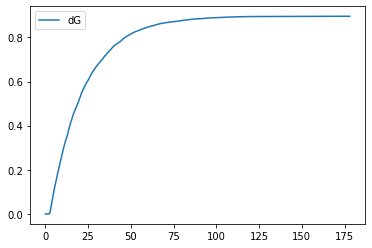

In [ ]:
gamma = 0.05
beta = 1
t0   = 0
tmax = 300

print(f'R0 = {beta/gamma}')

tg,Sg,Ig,Rg = EoN.fast_SIR(dG, beta, gamma, rho=1/N, tmin=t0, tmax=tmax, transmission_weight='weight')

plt.plot(tg, Rg/N, label="dG")

plt.legend()

**Plot of SIR dynamics**

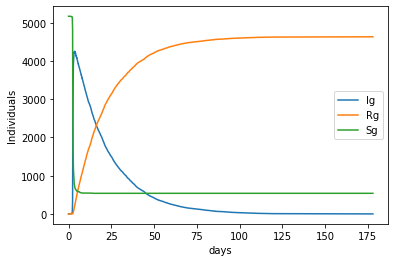

In [ ]:
plt.plot(tg, Ig, label='Ig')
plt.plot(tg, Rg, label='Rg')
plt.plot(tg, Sg, label='Sg')
plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()

**Calculation of HMF threshold using dG structure**

In [ ]:
k_mean = average_degree

k_2_mean = np.mean([i[1]*i[1] for i in list(G1.degree())])

print(k_mean)
print(k_2_mean)

HMF_threshold = k_mean/(k_2_mean - 2*k_mean)

print("heterogeneous mean-field approach (HMF) threshold: " + str(HMF_threshold) + '\n')

8.83996907614998
267.54696559721685
heterogeneous mean-field approach (HMF) threshold: 0.03537869388588596



**Plot of epidemic size curve with beta changes (above and below the HMF threshold) when gamma is fixed**

[11.58, 88.66, 529.03, 1074.95, 1743.62, 2161.99, 2398.3, 3034.29, 2765.71, 3153.12, 3170.62]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]


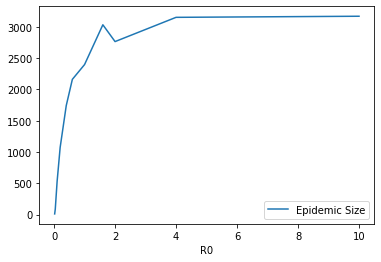

In [ ]:
gamma      = 0.05
beta_vals  = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
avgdeg = sum([d for n,d in dG.degree()])/N

p_vals = []
p_2_vals = []
R0_vals = []

for beta in beta_vals:
    R_vals = []
    for i in range(100):
        t,S,I,R = EoN.fast_SIR(dG, beta, gamma, rho=1/N, tmin=t0, tmax=tmax, transmission_weight='weight')
        R_vals.append(R[-1])  # Final epidemic size = Rinf = R[-1]
    p_vals.append(sum([j for j in R_vals])/len(R_vals))
    p_2_vals.append(sum([j*j for j in R_vals])/len(R_vals))
    R0_vals.append(beta/gamma)


print(p_vals)
#print(p_2_vals)
print(R0_vals)

plt.plot(R0_vals, p_vals, label='Epidemic Size')
plt.xlabel('R0')
plt.legend()


**Calculation of delta threshold based on the epidemic size values (p_vals)**

In [ ]:
epidemic_var = []

for i in range(len(p_vals)):                    # for each p_val, we calculate the corresponding delta value = EPIDEMIC VARIABILITY
    epidemic_var.append(math.sqrt(p_2_vals[i] - (p_vals[i] * p_vals[i]))/p_vals[i])

print(epidemic_var)
print(max(epidemic_var))

max_beta_idx = epidemic_var.index(max(epidemic_var))          # find the maximum value of delta (MAXIMUM EPIDEMIC VARIABILITY) and
max_beta = beta_vals[max_beta_idx]              # the associated value of beta
print(max_beta)


print("Gamma-beta values for maximum of the epidemic variability: " + str(gamma) + ", " + str(max_beta))

[3.6675329695278043, 2.877841369649837, 1.9338497222127444, 1.422398154175923, 1.0821826378743356, 0.9223405629176205, 0.8681164197585611, 0.6542584208666841, 0.7655416241874843, 0.6543958189051929, 0.6698688855368644]
3.6675329695278043
0.001
Gamma-beta values for maximum of the epidemic variability: 0.05, 0.001


[0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]
0.02


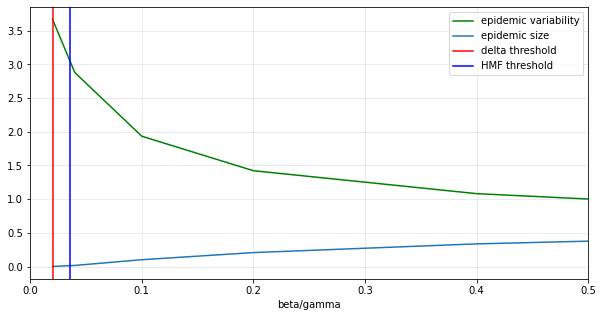

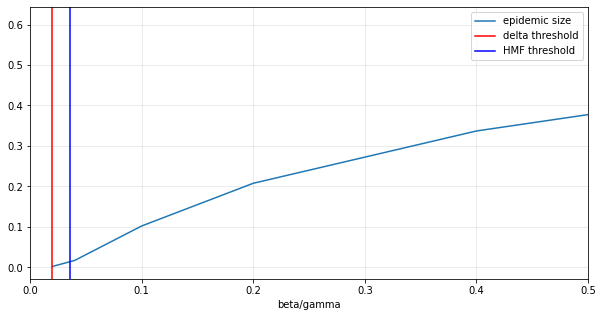

In [ ]:
print(beta_vals)
x = [beta/gamma for beta in beta_vals]
print(x)
print(max_beta/gamma)

plt.figure(figsize=(10,5))
plt.plot(x, epidemic_var, label='epidemic variability', color='g')
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

Now the epidemic threshold ($0.02$) is before the HMF threshold ($0.035$).

### Power-law

**Generation of N weights (one for each node) using Power-Law distribution**

In [ ]:
weights = scipy.stats.powerlaw.rvs(2, loc = 0, scale = 1, size = 5174)

print(weights)

[0.54792157 0.64142137 0.68389672 ... 0.75976822 0.85986008 0.8431793 ]


**Creation of a dictionary with keys = edge (i,j) and values = weight of the first node of the edge**

In [ ]:
dict_weights = {}

for i,j in dG.edges():
  dict_weights[(i,j)] = weights[i]
  dict_weights[(j,i)] = weights[j]

for i in range(5):
  print(list(dict_weights)[i])
  print(list(dict_weights.values())[i])

(0, 4484)
0.5479215669610346
(4484, 0)
0.8311396097965235
(0, 2678)
0.5479215669610346
(2678, 0)
0.5278967145332957
(0, 4361)
0.5479215669610346


**Setting of attribute "weight" for each edge in the direct graph dG**

In [ ]:
nx.set_edge_attributes(dG, values = dict_weights, name = 'weight')

In [ ]:
# print to check the setting

dG.edges(data = True)

OutEdgeDataView([(0, 4484, {'weight': 0.5479215669610346}), (0, 2678, {'weight': 0.5479215669610346}), (0, 4361, {'weight': 0.5479215669610346}), (0, 3971, {'weight': 0.5479215669610346}), (0, 898, {'weight': 0.5479215669610346}), (0, 3435, {'weight': 0.5479215669610346}), (0, 2343, {'weight': 0.5479215669610346}), (0, 3177, {'weight': 0.5479215669610346}), (0, 2408, {'weight': 0.5479215669610346}), (0, 1602, {'weight': 0.5479215669610346}), (0, 4101, {'weight': 0.5479215669610346}), (0, 759, {'weight': 0.5479215669610346}), (0, 834, {'weight': 0.5479215669610346}), (0, 4316, {'weight': 0.5479215669610346}), (0, 3647, {'weight': 0.5479215669610346}), (4484, 0, {'weight': 0.8311396097965235}), (4484, 85, {'weight': 0.8311396097965235}), (4484, 106, {'weight': 0.8311396097965235}), (4484, 2709, {'weight': 0.8311396097965235}), (4484, 629, {'weight': 0.8311396097965235}), (4484, 737, {'weight': 0.8311396097965235}), (4484, 924, {'weight': 0.8311396097965235}), (4484, 1018, {'weight': 0.83

**SIR calculation with gamma and beta of our choice**

R0 = 20.0


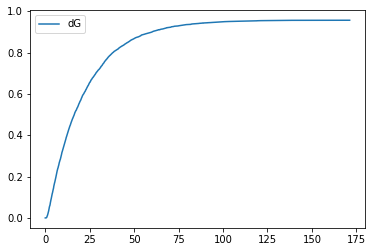

In [ ]:
gamma = 0.05
beta = 1
t0   = 0
tmax = 300

print(f'R0 = {beta/gamma}')

tp,Sp,Ip,Rp = EoN.fast_SIR(dG, beta, gamma, rho=1/N, tmin=t0, tmax=tmax, transmission_weight='weight')

plt.plot(tp, Rp/N, label="dG")

plt.legend()

**Plot of SIR dynamics**

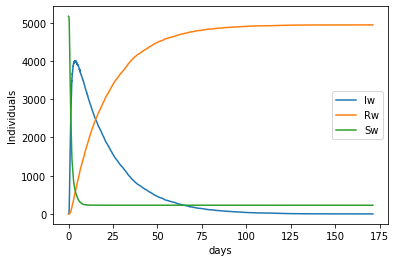

In [ ]:
plt.plot(tp, Ip, label='Iw')
plt.plot(tp, Rp, label='Rw')
plt.plot(tp, Sp, label='Sw')
plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()

**Calculation of HMF threshold using dG structure**

In [ ]:
k_mean = average_degree

k_2_mean = np.mean([i[1]*i[1] for i in G1.degree()])

print(k_mean)
print(k_2_mean)

HMF_threshold = k_mean/(k_2_mean - 2*k_mean)

print("heterogeneous mean-field approach (HMF) threshold: " + str(HMF_threshold) + '\n')

8.83996907614998
267.54696559721685
heterogeneous mean-field approach (HMF) threshold: 0.03537869388588596



**Plot of epidemic size curve with beta changes (above and below the HMF threshold) when gamma is fixed**

[1.15, 2.44, 14.59, 247.85, 949.64, 1649.62, 2263.98, 2633.98, 3040.57, 3538.48, 4470.91]
[2.03, 122.0, 4013.87, 326361.81, 2371236.06, 5039141.86, 8266007.16, 10669085.32, 12838178.55, 16259331.66, 21726170.99]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]


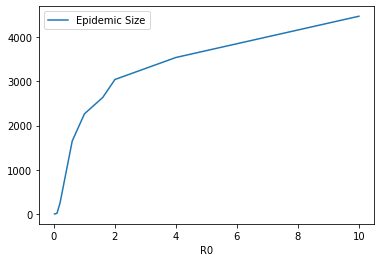

In [ ]:
gamma      = 0.05
beta_vals  = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
avgdeg = sum([d for n,d in dG.degree()])/N

p_vals = []
p_2_vals = []
R0_vals = []

for beta in beta_vals:
    R_vals = []
    for i in range(100):
        t,S,I,R = EoN.fast_SIR(dG, beta, gamma, rho=1/N, tmin=t0, tmax=tmax, transmission_weight='weight')
        R_vals.append(R[-1])  # Final epidemic size = Rinf = R[-1]
    p_vals.append(sum([j for j in R_vals])/len(R_vals))
    p_2_vals.append(sum([j*j for j in R_vals])/len(R_vals))
    R0_vals.append(beta/gamma)


print(p_vals)
print(p_2_vals)
print(R0_vals)

plt.plot(R0_vals, p_vals, label='Epidemic Size')
plt.xlabel('R0')
plt.legend()


**Calculation of delta threshold based on the epidemic size values (p_vals)**

In [ ]:
epidemic_var = []

for i in range(len(p_vals)):                    # for each p_val, we calculate the corresponding delta value = EPIDEMIC VARIABILITY
    epidemic_var.append(math.sqrt(p_2_vals[i] - (p_vals[i] * p_vals[i]))/p_vals[i])

print(epidemic_var)
print(max(epidemic_var))

max_beta_idx = epidemic_var.index(max(epidemic_var))          # find the maximum value of delta (MAXIMUM EPIDEMIC VARIABILITY) and
max_beta = beta_vals[max_beta_idx]              # the associated value of beta
print(max_beta)


print("Gamma-beta values for maximum of the epidemic variability: " + str(gamma) + ", " + str(max_beta))

[0.7314175583156836, 4.414952239683746, 4.225652225921804, 2.0767223623667452, 1.276479850283584, 0.9229178230572359, 0.7827444866052382, 0.7333542439833746, 0.6234195379593638, 0.5464260828165755, 0.2947954851823908]
4.414952239683746
0.002
Gamma-beta values for maximum of the epidemic variability: 0.05, 0.002


[0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]
0.04


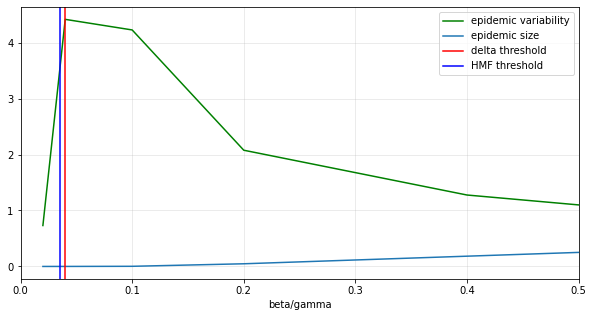

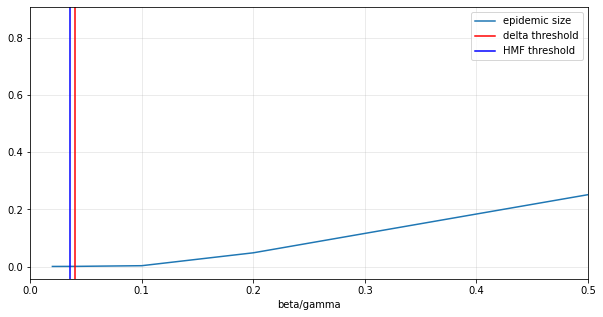

In [ ]:
print(beta_vals)
x = [beta/gamma for beta in beta_vals]
print(x)
print(max_beta/gamma)

plt.figure(figsize=(10,5))
plt.plot(x, epidemic_var, label='epidemic variability', color='g')
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

Now the epidemic threshold is very close to the HMF threshold ($0.04$ and $0.035$). So there is a huge difference between the use of Gaussian distribution for the weights with respect to the use of Power-Law distribution.



### Uniform (0,1)

**Generation of N weights (one for each node) using Uniform(0,1) distribution**

In [ ]:
weights = np.random.uniform(0, 1, 5174)

print(weights)

[0.21524756 0.86121109 0.78852488 ... 0.66247193 0.05906933 0.59830169]


**Creation of a dictionary with keys = edge (i,j) and values = weight of the first node of the edge**

In [ ]:
dict_weights = {}

for i,j in dG.edges():
  dict_weights[(i,j)] = weights[i]
  dict_weights[(j,i)] = weights[j]

for i in range(5):
  print(list(dict_weights)[i])
  print(list(dict_weights.values())[i])

(0, 4484)
0.21524756107746357
(4484, 0)
0.8249494484167439
(0, 2678)
0.21524756107746357
(2678, 0)
0.3995488912353362
(0, 4361)
0.21524756107746357


**Setting of attribute "weight" for each edge in the direct graph dG**

In [ ]:
nx.set_edge_attributes(dG, values = dict_weights, name = 'weight')

In [ ]:
# print to check the setting

dG.edges(data = True)

OutEdgeDataView([(0, 4484, {'weight': 0.21524756107746357}), (0, 2678, {'weight': 0.21524756107746357}), (0, 4361, {'weight': 0.21524756107746357}), (0, 3971, {'weight': 0.21524756107746357}), (0, 898, {'weight': 0.21524756107746357}), (0, 3435, {'weight': 0.21524756107746357}), (0, 2343, {'weight': 0.21524756107746357}), (0, 3177, {'weight': 0.21524756107746357}), (0, 2408, {'weight': 0.21524756107746357}), (0, 1602, {'weight': 0.21524756107746357}), (0, 4101, {'weight': 0.21524756107746357}), (0, 759, {'weight': 0.21524756107746357}), (0, 834, {'weight': 0.21524756107746357}), (0, 4316, {'weight': 0.21524756107746357}), (0, 3647, {'weight': 0.21524756107746357}), (4484, 0, {'weight': 0.8249494484167439}), (4484, 85, {'weight': 0.8249494484167439}), (4484, 106, {'weight': 0.8249494484167439}), (4484, 2709, {'weight': 0.8249494484167439}), (4484, 629, {'weight': 0.8249494484167439}), (4484, 737, {'weight': 0.8249494484167439}), (4484, 924, {'weight': 0.8249494484167439}), (4484, 1018, 

**SIR calculation with gamma and beta of our choice**

R0 = 20.0


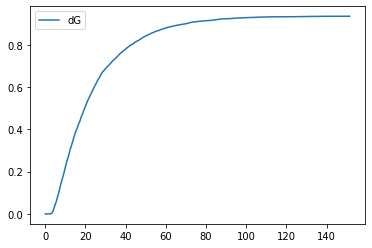

In [ ]:
gamma = 0.05
beta = 1
t0   = 0
tmax = 300

print(f'R0 = {beta/gamma}')

tu,Su,Iu,Ru = EoN.fast_SIR(dG, beta, gamma, rho=1/N, tmin=t0, tmax=tmax, transmission_weight='weight')

plt.plot(tu, Ru/N, label="dG")

plt.legend()

**Plot of SIR dynamics**

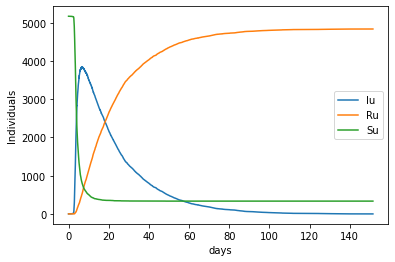

In [ ]:
plt.plot(tu, Iu, label='Iu')
plt.plot(tu, Ru, label='Ru')
plt.plot(tu, Su, label='Su')
plt.xlabel('days')
plt.ylabel('Individuals')
plt.legend()

**Calculation of HMF threshold using dG structure**

In [ ]:
k_mean = average_degree

k_2_mean = np.mean([i[1]*i[1] for i in list(G1.degree())])

print(k_mean)
print(k_2_mean)

HMF_threshold = k_mean/(k_2_mean - 2*k_mean)

print("heterogeneous mean-field approach (HMF) threshold: " + str(HMF_threshold) + '\n')

8.83996907614998
267.54696559721685
heterogeneous mean-field approach (HMF) threshold: 0.03537869388588596



**Plot of epidemic size curve with beta changes (above and below the HMF threshold) when gamma is fixed**

[1.13, 1.28, 7.17, 77.54, 546.79, 878.4, 1535.19, 2296.18, 2141.99, 2994.32, 3995.61]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]


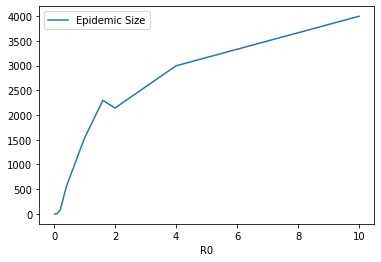

In [ ]:
gamma      = 0.05
beta_vals  = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
avgdeg = sum([d for n,d in dG.degree()])/N

p_vals = []
p_2_vals = []
R0_vals = []

for beta in beta_vals:
    R_vals = []
    for i in range(100):
        t,S,I,R = EoN.fast_SIR(dG, beta, gamma, rho=1/N, tmin=t0, tmax=tmax, transmission_weight='weight')
        R_vals.append(R[-1])  # Final epidemic size = Rinf = R[-1]
    p_vals.append(sum([j for j in R_vals])/len(R_vals))
    p_2_vals.append(sum([j*j for j in R_vals])/len(R_vals))
    R0_vals.append(beta/gamma)


print(p_vals)
#print(p_2_vals)
print(R0_vals)

plt.plot(R0_vals, p_vals, label='Epidemic Size')
plt.xlabel('R0')
plt.legend()


**Calculation of delta threshold based on the epidemic size values (p_vals)**

In [ ]:
epidemic_var = []

for i in range(len(p_vals)):                    # for each p_val, we calculate the corresponding delta value = EPIDEMIC VARIABILITY
    epidemic_var.append(math.sqrt(p_2_vals[i] - (p_vals[i] * p_vals[i]))/p_vals[i])

print(epidemic_var)
print(max(epidemic_var))

max_beta_idx = epidemic_var.index(max(epidemic_var))          # find the maximum value of delta (MAXIMUM EPIDEMIC VARIABILITY) and
max_beta = beta_vals[max_beta_idx]              # the associated value of beta
print(max_beta)


print("Gamma-beta values for maximum of the epidemic variability: " + str(gamma) + ", " + str(max_beta))

[0.3681883904905263, 1.0191046161950204, 5.004430343673829, 2.7202184863970396, 1.602289894777695, 1.3914026268132769, 1.0612648295694036, 0.7826976385782254, 0.9042186495411926, 0.6699706650843981, 0.41967852065864925]
5.004430343673829
0.005
Gamma-beta values for maximum of the epidemic variability: 0.05, 0.005


[0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5]
[0.02, 0.04, 0.09999999999999999, 0.19999999999999998, 0.39999999999999997, 0.6, 1.0, 1.5999999999999999, 2.0, 4.0, 10.0]
0.09999999999999999


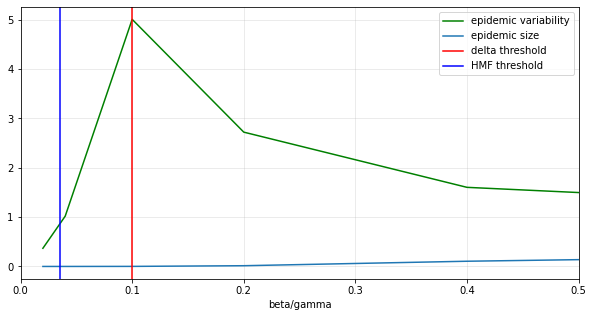

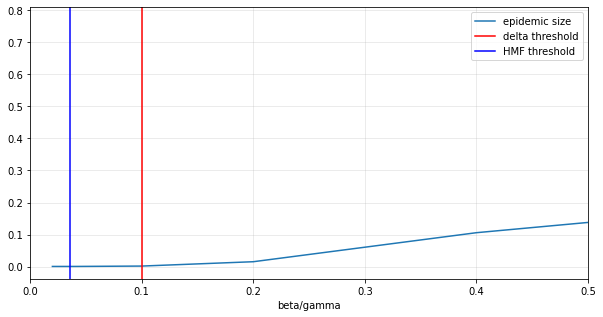

In [ ]:
print(beta_vals)
x = [beta/gamma for beta in beta_vals]
print(x)
print(max_beta/gamma)

plt.figure(figsize=(10,5))
plt.plot(x, epidemic_var, label='epidemic variability', color='g')
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x, [p/N for p in p_vals], label='epidemic size')
plt.axvline(x= max_beta/gamma, label='delta threshold', color='r')
plt.axvline(x=0.0354, label='HMF threshold', color='b')
plt.xlabel('beta/gamma')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,0.5)
plt.show()

Here we can see that the values of the two thresholds return "distant" as in the case with constant weights. Obviously, however, we have various changes in the epidemic size graph and the maximum value of infected (and then recovered) does not overcome $4000$.